In [1]:
# import necessary libraries

%pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [2]:
#` Load the dataset

data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
data.shape

(1338, 7)

In [4]:
data = data.drop_duplicates()
data.shape

(1337, 7)

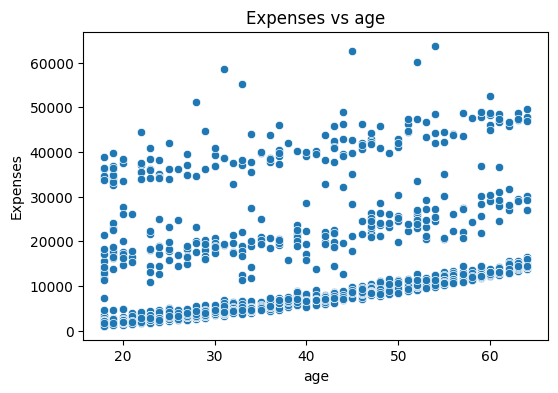

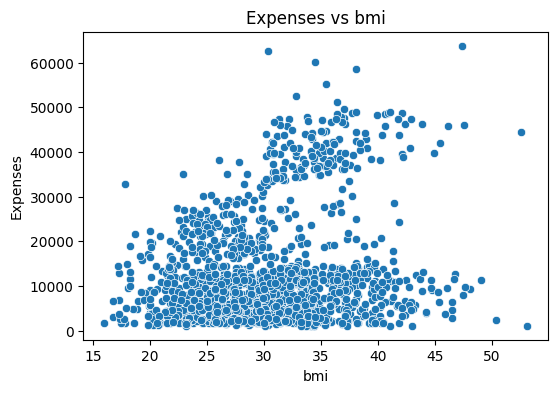

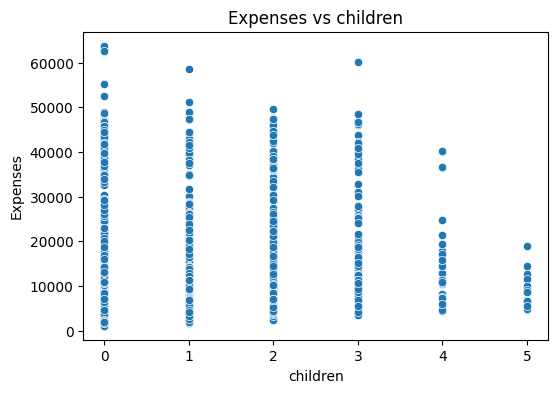

In [5]:
# data analysis

x_axis = ['age', 'bmi', 'children']

for x in x_axis:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=data, x=x, y='expenses')
    plt.title(f'Expenses vs {x}')
    plt.xlabel(x)
    plt.ylabel('Expenses')
    plt.show()

In [6]:
data['sex'] = data.sex.map({'female': 0, 'male': 1})
data.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [7]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
data['region'] = data.region.map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,0,16884.92
1,18,1,33.8,1,no,1,1725.55
2,28,1,33.0,3,no,1,4449.46
3,33,1,22.7,0,no,2,21984.47
4,32,1,28.9,0,no,2,3866.86


In [9]:
data['smoker'] = data.smoker.map({'no': 0, 'yes': 1})
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


In [10]:
# split the data into features and target variable

data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [11]:
x = data.drop('expenses', axis=1)
y = data[['expenses']]  

In [12]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,0
1,18,1,33.8,1,0,1
2,28,1,33.0,3,0,1
3,33,1,22.7,0,0,2
4,32,1,28.9,0,0,2


In [13]:
y.head()

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


In [14]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Note: you may need to restart the kernel to use updated packages.


In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1069, 6), (268, 6), (1069, 1), (268, 1))

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
from sklearn.metrics import r2_score, mean_squared_error

# Train the model
lr.fit(x_train, y_train)

# Make predictions
y_pred = lr.predict(x_test)

# Print model performance metrics
print(f'R2 Score: {r2_score(y_test, y_pred):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

R2 Score: 0.8068
RMSE: 5957.90


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Create and train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Make predictions
rf_pred = rf.predict(x_test)

# Print model performance metrics
print(f'Random Forest R2 Score: {r2_score(y_test, rf_pred):.4f}')
print(f'Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.2f}')

# Compare with Linear Regression results
print('\nLinear Regression Results:')
print(f'Linear Regression R2 Score: {r2_score(y_test, y_pred):.4f}')
print(f'Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

/mnt/e4cb339d-0ebd-4b84-b21c-d2afe6a4187e/Insurance Premium Prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest R2 Score: 0.8827
Random Forest RMSE: 4643.49

Linear Regression Results:
Linear Regression R2 Score: 0.8068
Linear Regression RMSE: 5957.90


In [3]:
# save the model
import joblib
joblib.dump(rf, 'insurance_premium_model.pkl')

NameError: name 'rf' is not defined

In [2]:
import os
from IPython.display import FileLink, display

fname = 'insurance_premium_model.pkl'
if not os.path.exists(fname):
    raise FileNotFoundError(f"'{fname}' not found. Run the cell that saves the model first (cell 18).")

# Display download link for the model file
display(FileLink(fname))

/mnt/e4cb339d-0ebd-4b84-b21c-d2afe6a4187e/Insurance Premium Prediction/static/insurance_premium_model.pkl